# Imporing Library

In [86]:
import warnings
warnings.filterwarnings("ignore")

import warnings: This line imports the warnings module, which is a standard Python module used to handle warnings that can be generated during the execution of a program.

warnings.filterwarnings("ignore"): This line sets up a filter to ignore (suppress) all warning messages generated by Python during the execution of your code.

In [87]:
import os

# Get the number of CPU cores
num_cores = os.cpu_count()

print(f"Number of CPU cores: {num_cores}")

Number of CPU cores: 2


In [88]:
import sys
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

import sys: This imports the Python sys module, which provides access to various system-specific parameters and functions.

!pip install -q dtreeviz: If the code is running in Google Colab, it uses the ! syntax to run a shell command inside Colab's environment. In this case, it's using pip to install the dtreeviz package with the -q flag, which makes the installation process quiet (no verbose output).

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Dataset Loading

In [90]:
#load the data set
data = pd.read_csv('IRIS.csv')

In [91]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [92]:
data.shape

(150, 5)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Preprocessing

In [94]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

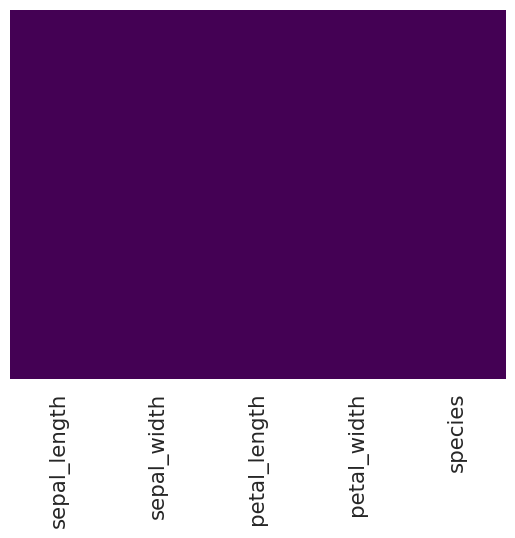

In [95]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see that no null value is present in the dataset. So, there is no need to handle or remove null values.

# Dataset Visualization

In [96]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


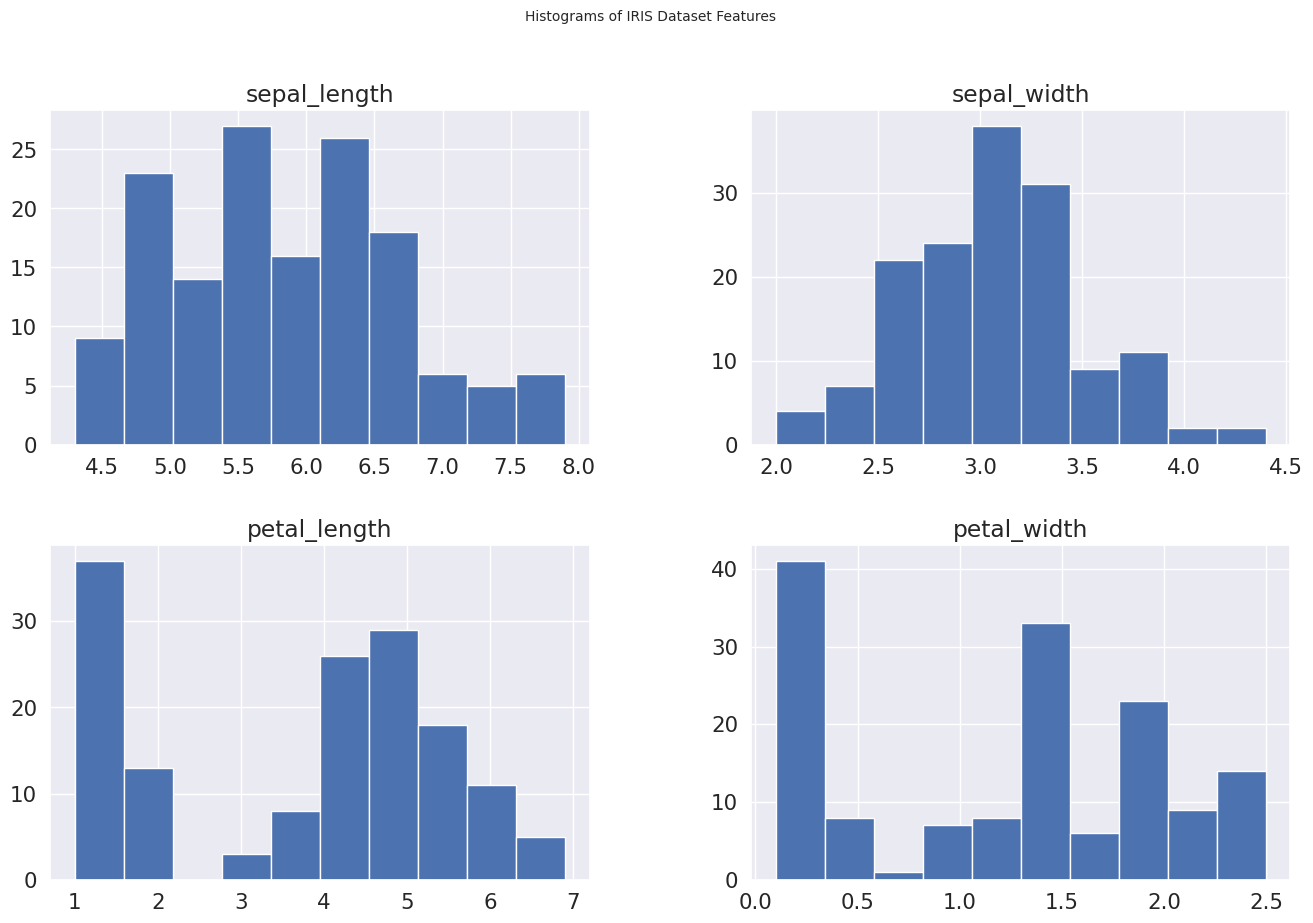

In [97]:
data.hist(figsize=(16, 10))
plt.suptitle("Histograms of IRIS Dataset Features", fontsize=10)
plt.show()

<Axes: xlabel='species', ylabel='count'>

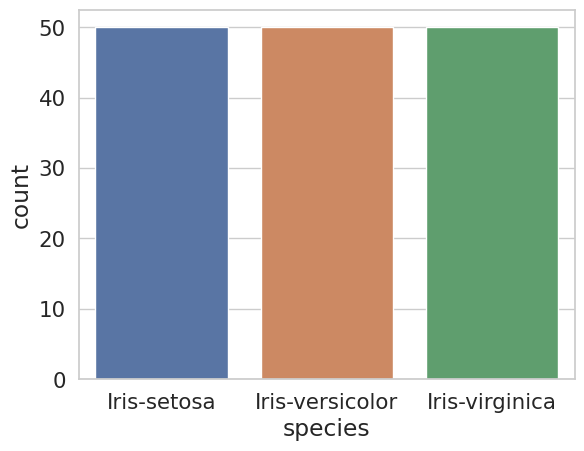

In [98]:
sns.set_style('whitegrid')
sns.countplot(x='species',data=data)

Show total number of records present of each type of species

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

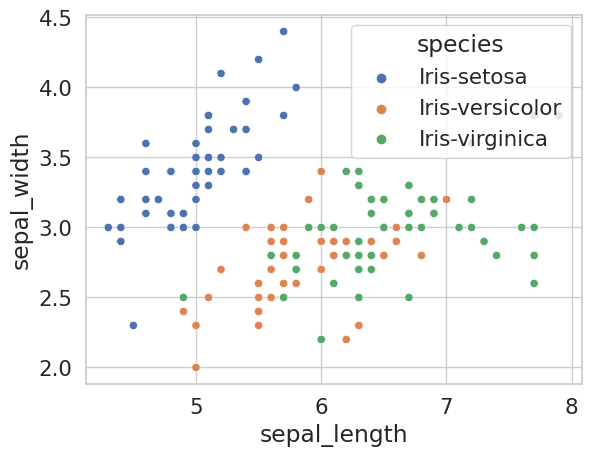

In [99]:
sns.scatterplot(data=data,x="sepal_length", y="sepal_width",hue="species")

<Axes: xlabel='sepal_length', ylabel='petal_length'>

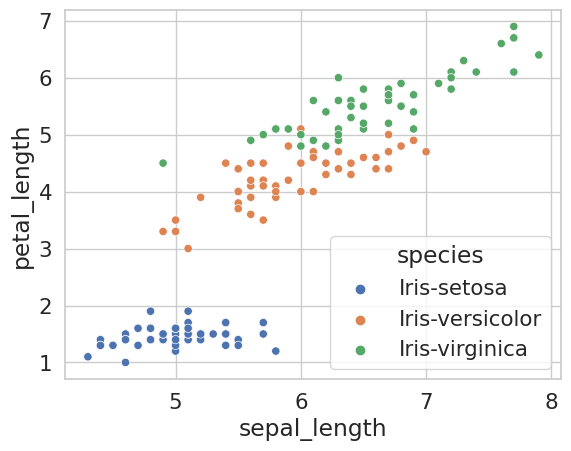

In [100]:
sns.scatterplot(data=data,x="sepal_length", y="petal_length",hue="species")

<Axes: xlabel='sepal_length', ylabel='petal_width'>

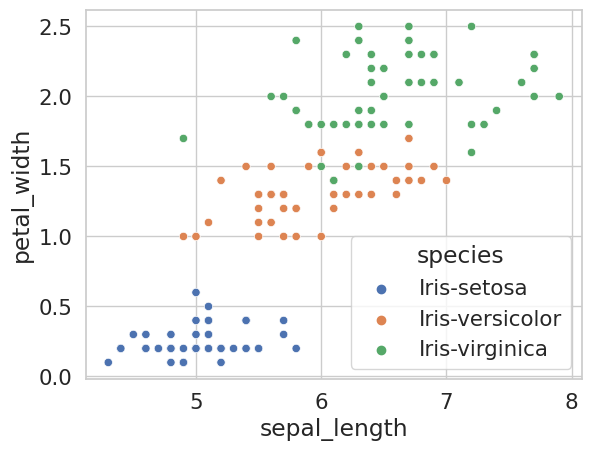

In [101]:
sns.scatterplot(data=data,x="sepal_length", y="petal_width",hue="species")

<Axes: xlabel='sepal_width', ylabel='petal_length'>

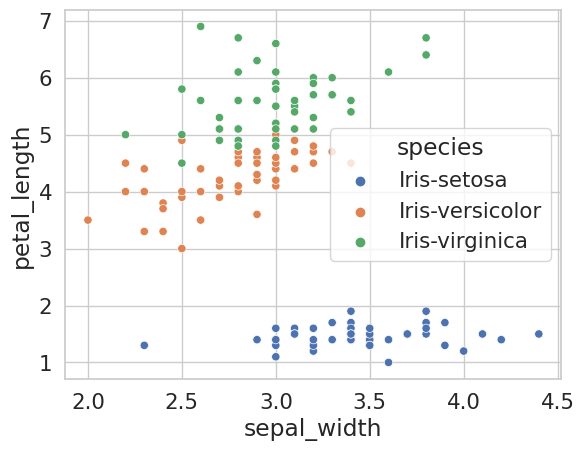

In [102]:
sns.scatterplot(data=data,x="sepal_width", y="petal_length",hue="species")

<Axes: xlabel='sepal_width', ylabel='petal_width'>

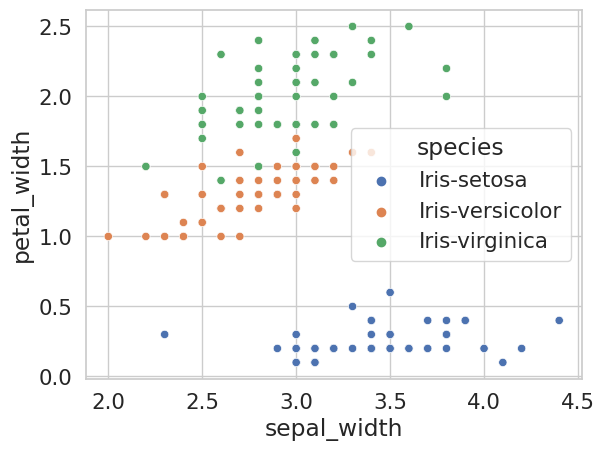

In [103]:
sns.scatterplot(data=data,x="sepal_width", y="petal_width",hue="species")

<Axes: xlabel='petal_length', ylabel='petal_width'>

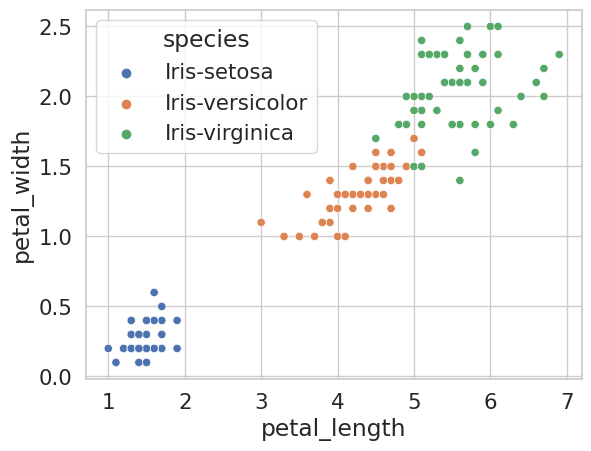

In [104]:
sns.scatterplot(data=data,x="petal_length", y="petal_width",hue="species")

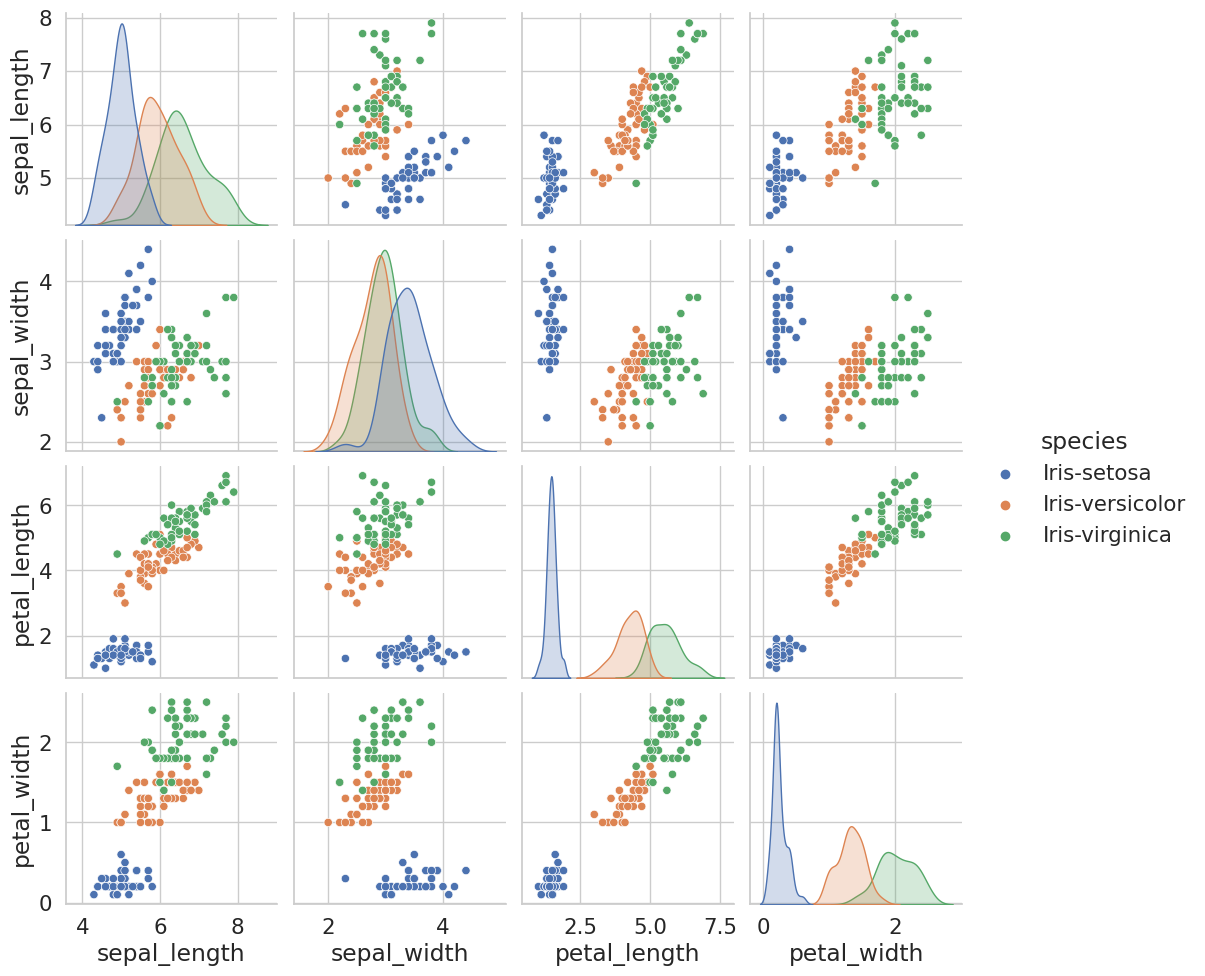

In [105]:
sns.pairplot(data,hue='species')

# Split the Data into Training and Testing Sets

Define the target variable

In [106]:
X = data.drop('species', axis=1)
y = data['species']

Split the dataset into training and testing sets

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize features

In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Support Vector Machine

Create and train the Support Vector Machine algorithm

In [109]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

Make predictions on the test data

In [110]:
y_pred_svm = model_svm.predict(X_test)

##Model Evaluation

Evaluate the model's performance on the test dataset by calculating accuracy and other relevant metrics.

In [115]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)*100
f1_score_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("F1 Score:", f1_score_svm)

Accuracy: 100.0
F1 Score: 1.0


In [117]:
svm_report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", svm_report)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



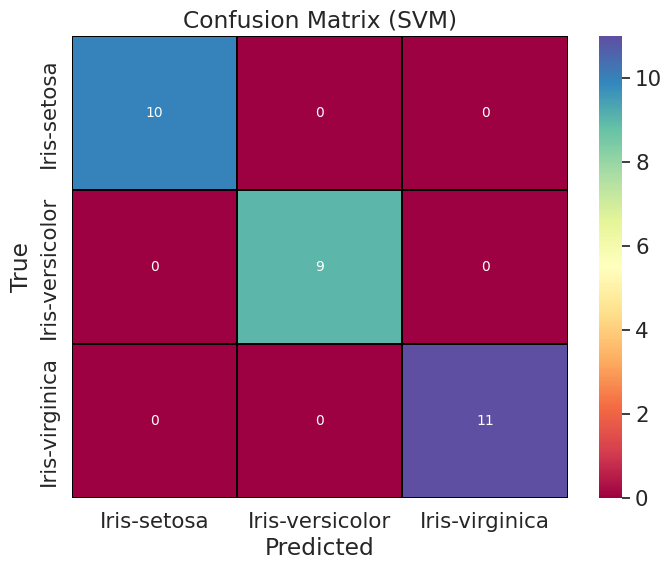

In [122]:
# Calculate the confusion matrix
confusion_matrix_iris = confusion_matrix(y_test, y_pred_svm)

# Define class labels for Iris dataset
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_iris, annot=True, fmt='d', cmap='Spectral', cbar=True,
            annot_kws={'size': 10}, linewidths=0.2, linecolor='black',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Logistic Regression Model

Create and train the logistic regression model

In [123]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Make predictions on the test data

In [124]:
y_pred = model.predict(X_test)

## Model Evaluation

Evaluate the model's performance on the test dataset by calculating accuracy and other relevant metrics.

In [125]:
accuracy = accuracy_score(y_test, y_pred)*100
f1_score = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)

Accuracy: 100.0
F1 Score: 1.0


In [126]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



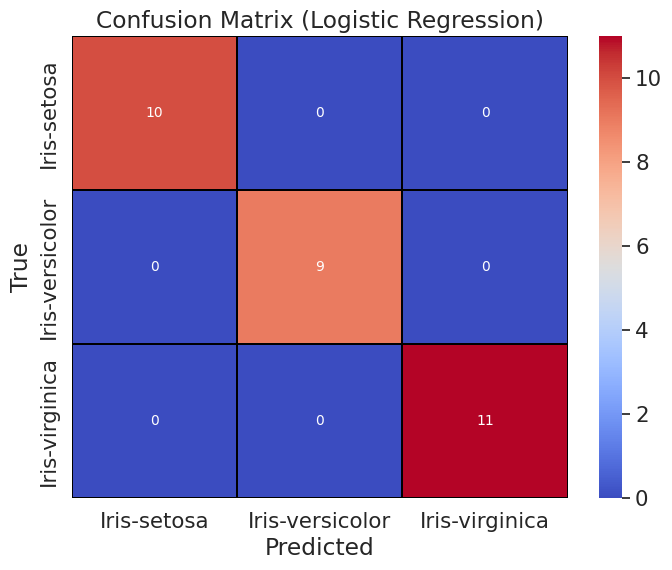

In [129]:
# Calculate the confusion matrix
confusion_matrix_iris = confusion_matrix(y_test, y_pred)

# Define class labels for Iris dataset
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_iris, annot=True, fmt='d', cmap='coolwarm', cbar=True,
            annot_kws={'size': 10}, linewidths=0.2, linecolor='black',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Use of Confusion matrix
Confusion matrix is a fundamental tool in the field of machine learning and statistics used to assess the performance of a classification model. It provides a clear and concise summary of the model's predictions compared to the actual ground truth values in a classification problem.

The confusion matrix is typically a square matrix that organizes the model's predictions into four categories:

1. True Positives (TP): These are cases where the model correctly predicted a positive class (e.g., correctly identifying a disease in a medical diagnosis).

2. True Negatives (TN): These are cases where the model correctly predicted a negative class (e.g., correctly identifying a non-disease in a medical diagnosis).

3. False Positives (FP): These are cases where the model incorrectly predicted a positive class when the true class is negative (e.g., falsely diagnosing a healthy person as having a disease).

4. False Negatives (FN): These are cases where the model incorrectly predicted a negative class when the true class is positive (e.g., failing to diagnose a person with a disease when they actually have it).

From these four values, various performance metrics can be derived to evaluate the model's accuracy, precision, recall, F1-score, and more. These metrics help stakeholders understand how well the model is performing in terms of correctly classifying instances and avoiding false predictions.

Confusion matrices are particularly useful for assessing the strengths and weaknesses of a model and for making informed decisions about model improvement, such as adjusting thresholds or fine-tuning the model's parameters. They provide a clear and intuitive way to visualize the model's performance in classification tasks, making them an essential tool in machine learning evaluation and diagnostics.

